Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [ ]:
titanic_df = pd.read_csv('train.csv')

In [ ]:
print(titanic_df.dtypes)
print(titanic_df.info())
titanic_df.head()

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

0    549
1    342
Name: Survived, dtype: int64


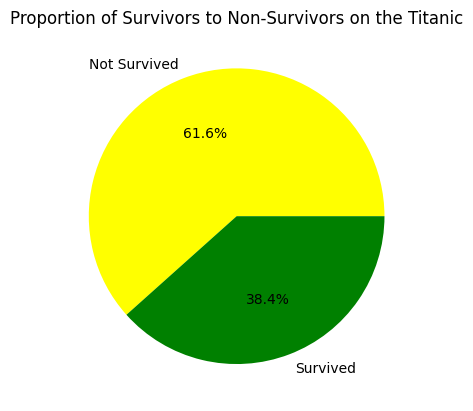

In [ ]:
survival_counts = titanic_df['Survived'].value_counts()
print(survival_counts)

# Pie chart
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['yellow', 'green'])
plt.title('Proportion of Survivors to Non-Survivors on the Titanic')
plt.show()

*прокоментуйте отримані візуалізації

Кругова діаграма показує співвідношення виживаності на "Титаніку". З діаграми видно, що більша частка пасажирів загинула (61,6%) порівняно з тими, хто вижив (38,4%).

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


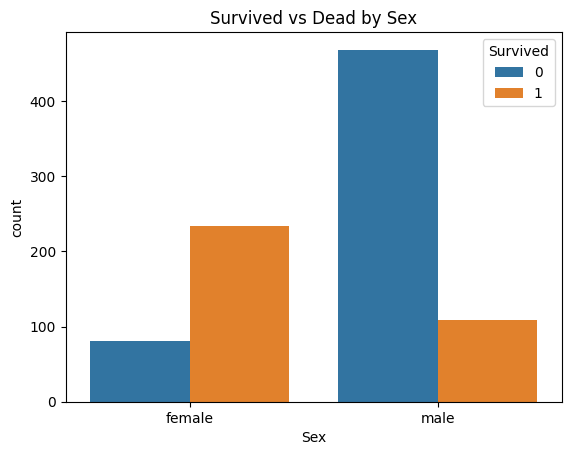

Survived    0    1
Sex               
female     81  233
male      468  109


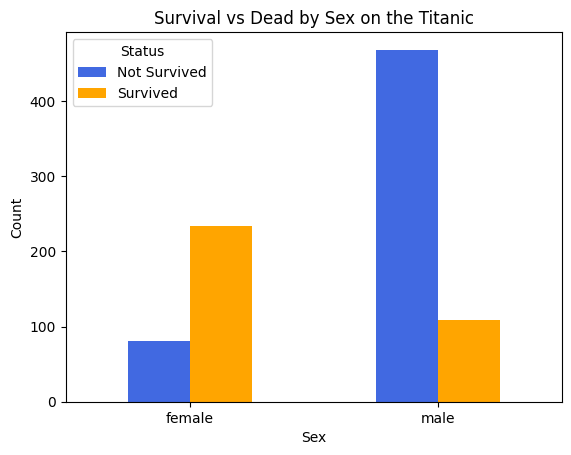

In [29]:
# Group by 'Sex' and 'Survived' and count the occurrences
survival_gender = titanic_df.groupby(['Sex', 'Survived'], as_index=False)['PassengerId'].count()

pivot_table = survival_gender.pivot(index='Sex', columns='Survived', values='PassengerId')
print(pivot_table)


pivot_table.columns = ['Not Survived', 'Survived']

# Bar chart
pivot_table.plot(kind='bar', color=['royalblue', 'orange'])
plt.title('Survival vs Dead by Sex on the Titanic')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.show()

*прокоментуйте отримані візуалізації

Візуалізація гістограми, показує кількість пасажирів "Титаніка", які вижили, з розбивкою за статтю. Значно більше жінок вижило (233) порівняно з тими, хто загинув (81), тоді як серед чоловіків кількість загиблих (468) перевищує кількість виживших (109) в більш ніж 4 рази. Це відображає історичну політику "жінки та діти спочатку", яка була застосована під час евакуації.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

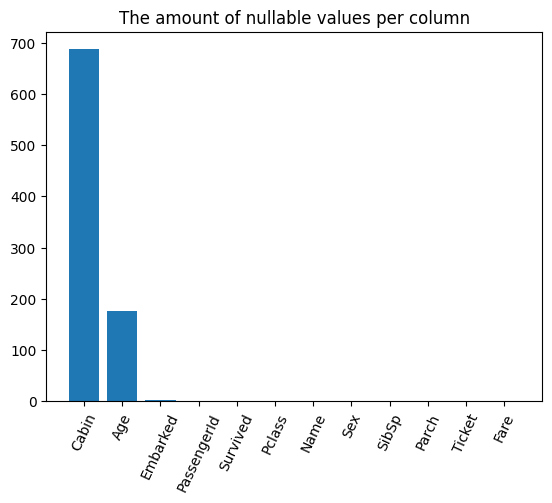

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


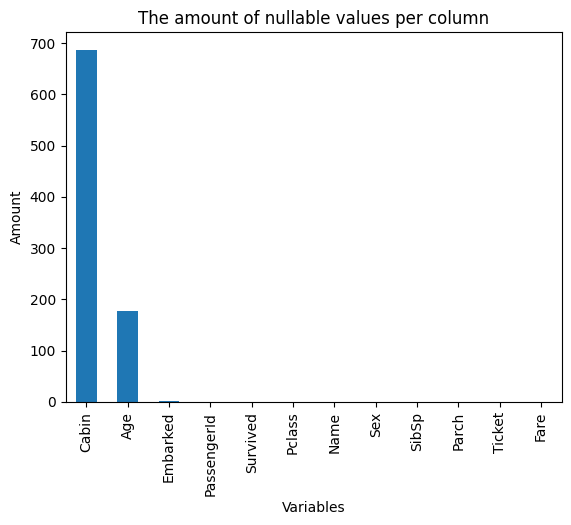

In [31]:
missing_values = titanic_df.isnull().sum().sort_values(ascending=False)
print(missing_values)

missing_values.plot(kind='bar')
plt.title('The amount of nullable values per column')
plt.xlabel('Variables')
plt.ylabel('Amount')
plt.show()

*прокоментуйте отримані візуалізації

Отримана візуалізація представляє кількість пропущених значень у кожній колонці датасету Titanic. Найбільша кількість пропущених даних знаходиться в колонці Cabin, де відсутні 687 записів. Колонка Age має 177 пропущених значень, що також є значною кількістю.

Колонка Cabin в датасеті Titanic містить інформацію про номер каюти, в якій розміщувався пасажир. Загальна кількість записів у датасеті становить 891, але для майже 700 з них дані про каюту відсутні. Це може бути з кількох причин:

*   Пасажири третього класу часто не мали привласнених кают, а замість цього спали в загальних спальних залах. Тому для багатьох з них інформація про каюту могла не фіксуватися.
*    Можливо, під час збору даних після катастрофи, інформація про каюту не вважалася критично важливою, і тому не всі дані були зібрані або збережені.
*    Інформація про каюти могла бути втрачена або не збережена належним чином під час збору даних. Враховуючи, що катастрофа сталася давно, багато записів могли бути знищені, пошкоджені або просто не занотовані.




5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

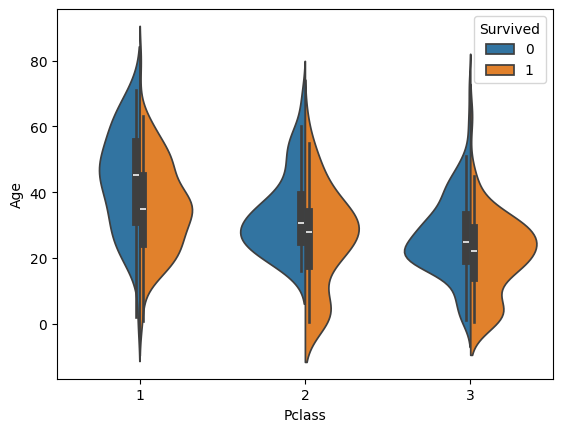

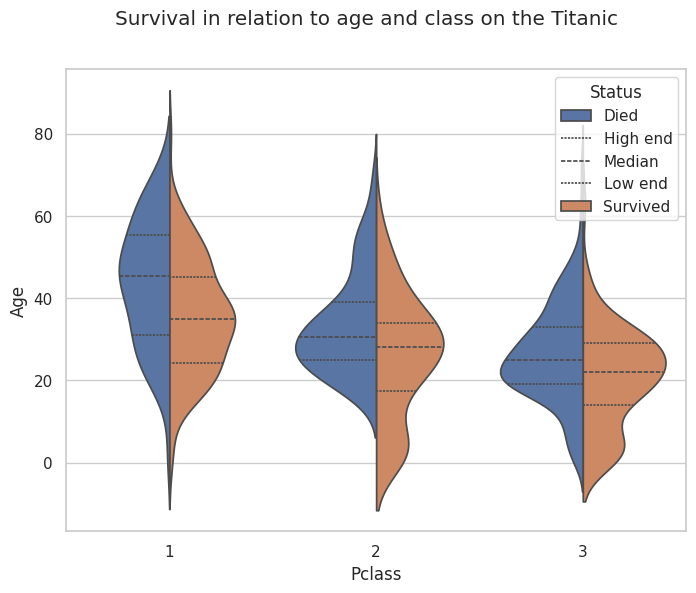

In [75]:
plt.figure(figsize=(8, 6))
plt.suptitle('Survival in relation to age and class on the Titanic')

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_df, split=True, inner='quartile')

plt.xlabel('Pclass')
plt.ylabel('Age')
plt.legend(title='Status', labels=['Died', 'High end','Median','Low end', 'Survived'])

plt.show()

*прокоментуйте отримані візуалізації

Візуалізація віку пасажирів Титаніка показує, що середній вік виживших пасажирів був зазвичай нижчим, ніж середній вік тих, хто загинув. Також помітно, що в першому класі вік виживших був вищчим, що може свідчити про кращі умови евакуації для більш заможних пасажирів або про вищу ймовірність отримання допомоги. У третьому класі, де умови були складнішими, виживали переважно наймолодші, що може бути пов'язано з меншими шансами на порятунок через переповненість та гірші умови евакуації.


6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


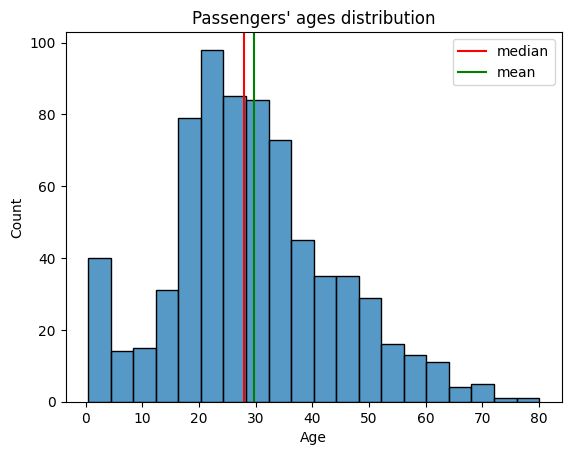

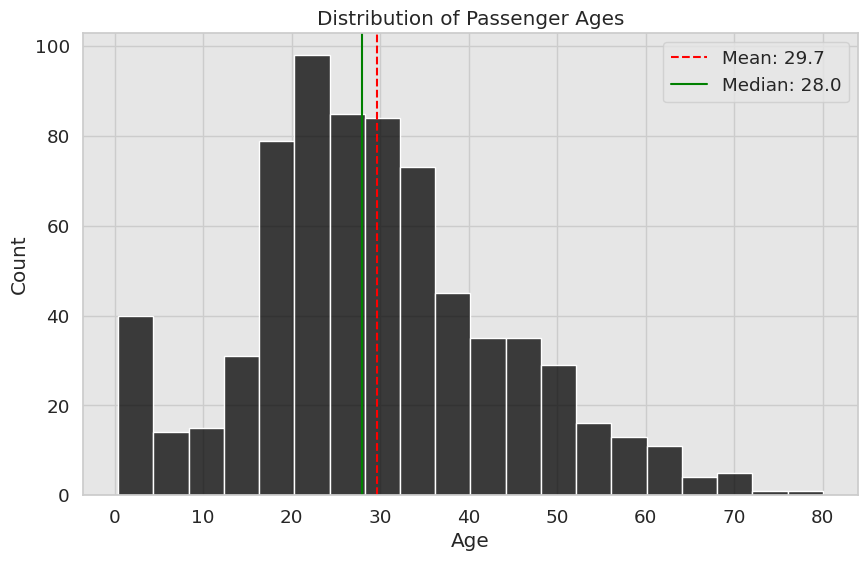

In [55]:
# Histogram for the 'Age' column, using 20 bins
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'].dropna(), bins=20, kde=False, color='black')

# Mean and median of the 'Age' column
mean_age = titanic_df['Age'].mean()
median_age = titanic_df['Age'].median()
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='-', label=f'Median: {median_age:.1f}')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Passenger Ages')
plt.legend()

plt.show()

*прокоментуйте отримані візуалізації

Найбільша кількість пасажирів (близько 100 осіб) належить до вікової групи 20-24 роки, що може вказувати на високу кількість молодих дорослих, які шукали нові можливості або подорожували за роботою. Також помітна значна кількість дітей (40 осіб у віковій групі до 4 років), що може свідчити про сімейні подорожі. З віком кількість пасажирів зменшується, що є типовим для більшості популяцій, і особливо мало літніх людей, що може бути пов'язано з меншою мобільністю та бажанням подорожувати у старшому віці.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.



*питання до даних

1. Яке відношення чоловіків та жінок в кожному класі (усього\виживших)
2. Яка кореляція між кількістю родичів на борту (SibSp + Parch) та шансами на виживання?
3. Як вік впливав на шанси виживання в різних класах кают?

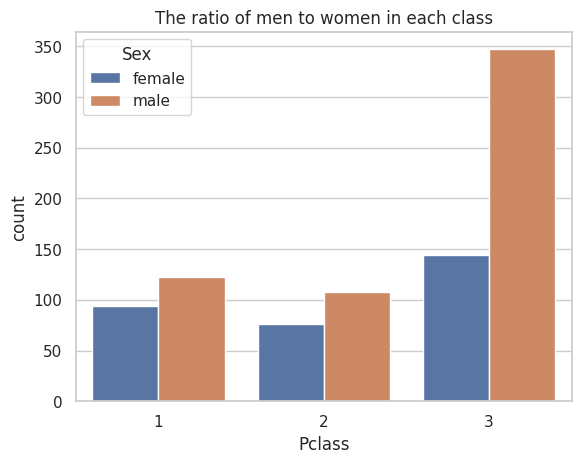

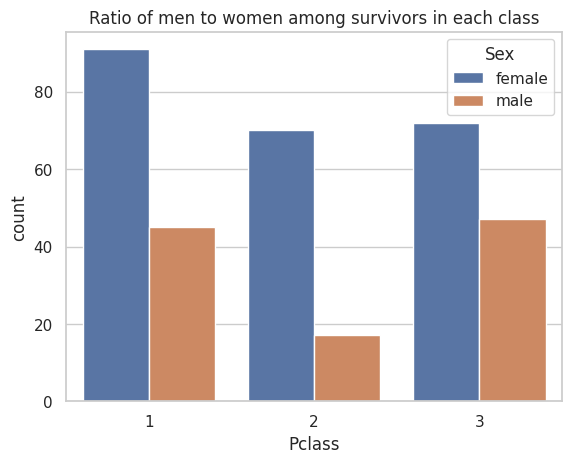

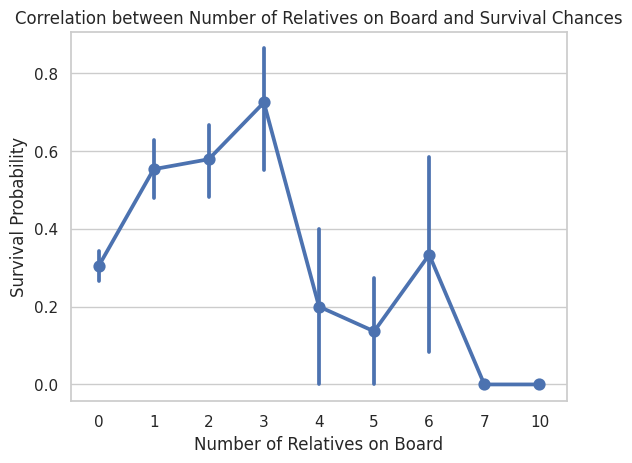

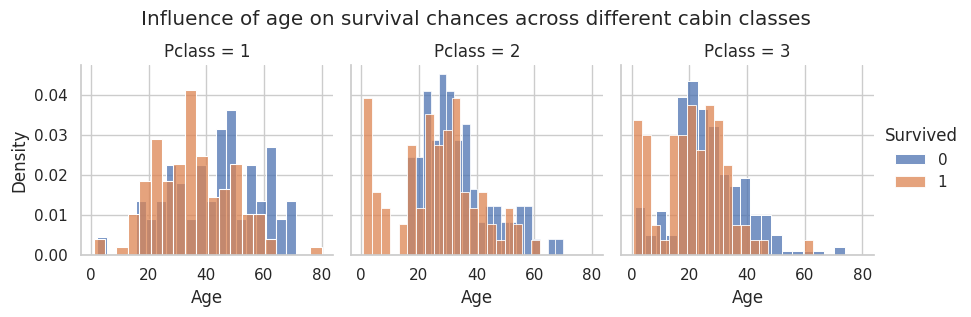

In [73]:
# 1.1. The ratio of men to women in each class
sns.countplot(x='Pclass', hue='Sex', data=titanic_df)
plt.title('The ratio of men to women in each class')
plt.show()

# 1.2. Ratio of men to women among survivors in each class
survived_df = titanic_df[titanic_df['Survived'] == 1]
sns.countplot(x='Pclass', hue='Sex', data=survived_df)
plt.title('Ratio of men to women among survivors in each class')
plt.show()

# 2. correlation between family size and survival chances
titanic_df_copy = titanic_df.copy()
titanic_df_copy['FamilySize'] = titanic_df_copy['SibSp'] + titanic_df_copy['Parch']

sns.pointplot(x='FamilySize', y='Survived', data=titanic_df_copy)
plt.title('Correlation between Number of Relatives on Board and Survival Chances')
plt.xlabel('Number of Relatives on Board')
plt.ylabel('Survival Probability')
plt.show()

# 3. Influence of age on survival chances across different cabin classes
g = sns.FacetGrid(titanic_df, col='Pclass', hue='Survived')
g.map(sns.histplot, 'Age', bins=20, kde=False, stat="density")
g.add_legend()
g.fig.suptitle('Influence of age on survival chances across different cabin classes', y=1.05)
plt.show()

*прокоментуйте отримані візуалізації

1. Співвідношення чоловіків до жінок показує, що на одну жінку припадало приблизно:
у першому класі - 1.3 чоловіка,
у другому класі - 1.4,
а у третьому - 2.4.
У третьому класі було значно більше чоловіків, що може бути пов'язано з економічними факторами, оскільки третій клас був найдоступнішим.

  У той же час, серед виживших співвідношення у кожному класі значно відрізняється від загального співвідношення у кожному класі. Це може вказувати на те, що жінки мали більші шанси на виживання, особливо у другому класі, що може бути пов'язано з пріоритетом евакуації жінок та дітей.


2. Кореляція між кількістю родичів на борту та шансами на виживання показує, що пасажири, які подорожували самі, мали менші шанси на виживання (близько 30%), тоді як ті, хто мав одного або двох родичів, мали кращі шанси (близько 55-58%). Однак зі збільшенням розміру сім'ї шанси на виживання знижувалися, що може бути пов'язано з труднощами при евакуації більших груп людей.


3. Середній вік виживших та невиживших у кожному класі вказує на те, що молодші люди в основному виживали частіше, також надаючи пріорітет дітям. У першому та  другому класі виживші були в середньому молодші на 8 років, у третьому - на 6 років. Це свідчить про те, що молодші пасажири мали більші шанси на виживання, можливо, через більшу фізичну спроможність до евакуації та пріоритет в спасінні.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

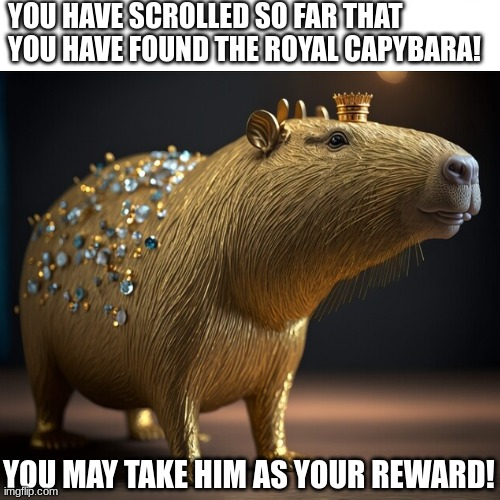